# Data Science Total

Filiale du Groupe TOTAL, ARGEDIS est en charge d’un panel de 180 relais situé en France en gestion directe sur son réseau autoroutier et voies rapides, l’une des vitrines privilégiées du Groupe en France.

Au travers de ses boutiques, ARGEDIS est résolument tournée vers l’automobiliste, afin de lui faire profiter aussi bien des services marchands (produits frais, du snacking et des boissons) que des services non-marchands tels que les salons détente, etc.

La prédiction de l’approvisionnement des boutiques est un enjeu important. Être capable d’anticiper les besoins des visiteurs est critique pour un meilleur service, pour éviter les ruptures, ainsi que le gaspillage lié aux invendus.

L’objectif de ce challenge est de réaliser des prévisions de vente d'une sélection de catégories de produit (boulangerie viennoiseries pâtisseries, charcuterie, crèmerie, fruits et légumes, traiteur, baguettes, triangles, autres sandwich industriels)...

Les données à disposition sont un historique de vente depuis janvier 2016, ainsi que certaines données open data (météo, trafic routier, congés scolaires).

Deux relais typiques ont été sélectionnés pour ce challenge.

https://datascience.total.com/fr/challenge/9/details#tab_ranking

In [1]:
import pandas as pd
import numpy as np
from datetime import *
from tqdm import *
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
dataset = pd.read_csv('train.csv',';')
X_eval = pd.read_csv('test.csv',';')

In [3]:
dataset.head()

,id,implant,date,article_nom,id_categorie_6,qte_article_vendue,id_categorie_5,id_categorie_4,cat6_nom,cat5_nom,cat4_nom,t_9h_rouen,n_9h_rouen,rr3_9h_rouen,ff_9h_rouen,t_15h_rouen,n_15h_rouen,rr3_15h_rouen,ff_15h_rouen,t_9h_paris,n_9h_paris,rr3_9h_paris,ff_9h_paris,t_15h_paris,n_15h_paris,rr3_15h_paris,ff_15h_paris,aller_zone_1,aller_zone_2,aller_zone_3,aller_zone_4,aller_zone_5,aller_zone_6,retour_zone_1,retour_zone_2,retour_zone_3,retour_zone_4,retour_zone_5,retour_zone_6
0,39fc404102d5,NF059473,2016-01-01,Cookie Cara Noix Pecan 70G Michel Augustin,1001672,"0,56",1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"278,25","100,0","0,2","4,0","280,05","100,0","0,0","7,6","278,05","101,0","0,0","2,5","280,55","100,0","0,0","3,2",0,0,0,0,0,0,0,0,0,0,0,0
1,aa697ce32b43,NF059473,2016-01-01,Cookie Choc Blc 70G Michel Augustin,1001672,"1,11",1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"278,25","100,0","0,2","4,0","280,05","100,0","0,0","7,6","278,05","101,0","0,0","2,5","280,55","100,0","0,0","3,2",0,0,0,0,0,0,0,0,0,0,0,0
2,291a469e1b50,NF059473,2016-01-01,Cookie Choc Nois 70G Michel Augustin,1001672,"0,56",1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"278,25","100,0","0,2","4,0","280,05","100,0","0,0","7,6","278,05","101,0","0,0","2,5","280,55","100,0","0,0","3,2",0,0,0,0,0,0,0,0,0,0,0,0
3,2dbc07dbc8f0,NF059473,2016-01-01,Cookie Choco 70G Michel Augustin,1001672,"0,56",1001664,1001639,Patiss PréEmballé,Patisserie,Boulan Vienn Patiss,"278,25","100,0","0,2","4,0","280,05","100,0","0,0","7,6","278,05","101,0","0,0","2,5","280,55","100,0","0,0","3,2",0,0,0,0,0,0,0,0,0,0,0,0
4,e664714361d6,NF059473,2016-01-01,Croissant 60G Cuit/Place Neuhauser,1001674,"4,08",1001665,1001639,Vienn cuit/place,Viennoiserie,Boulan Vienn Patiss,"278,25","100,0","0,2","4,0","280,05","100,0","0,0","7,6","278,05","101,0","0,0","2,5","280,55","100,0","0,0","3,2",0,0,0,0,0,0,0,0,0,0,0,0


# Create a dictionnary {article : [qte_article_vendue]}

In [4]:
iters ={}
means = {}
group = {}
temp = np.array(dataset[['article_nom','qte_article_vendue']])
for i in range(dataset.shape[0]):
    try:
        means[temp[i,0]] = (means[temp[i,0]]*iters[temp[i,0]]+float('.'.join(temp[i,1].split(','))))/(iters[temp[i,0]]+1)
        iters[temp[i,0]] += 1
        group[temp[i,0]].append(float('.'.join(temp[i,1].split(','))))
    except:
        iters[temp[i,0]] = 1
        means[temp[i,0]] = float('.'.join(temp[i,1].split(',')))
        group[temp[i,0]] = [float('.'.join(temp[i,1].split(',')))]

### Plot the distribution of a chosen article

C:\Users\avillemin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


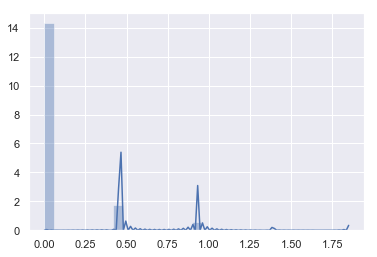

In [5]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(group['Shakissimo Latte Macchiato 190Ml Nescafe'])

### Create a dictionnary {article : {discrete_price : quantity}}

In [6]:
prices_dist = {}
for j in group:
    a=group[j]
    art = {}
    for i in range(len(a)):
        try:
            art[str(a[i])] += 1

        except:
            art[str(a[i])] = 1
    prices_dist[j] = art

In [7]:
prices_dist

{'Cookie Cara Noix Pecan 70G Michel Augustin': {'0.56': 79,
  '1.11': 19,
  '0.19': 106,
  '0.37': 108,
  '0.0': 551,
  '0.74': 50,
  '1.3': 11,
  '0.93': 32,
  '1.48': 7,
  '1.67': 5,
  '1.85': 1,
  '2.04': 1,
  '2.6': 1,
  '2.41': 1},
 'Cookie Choc Blc 70G Michel Augustin': {'1.11': 8,
  '0.0': 700,
  '0.37': 89,
  '0.19': 69,
  '0.74': 24,
  '0.56': 56,
  '1.48': 2,
  '0.93': 17,
  '2.04': 1,
  '1.3': 4,
  '1.67': 1,
  '3.15': 1},
 'Cookie Choc Nois 70G Michel Augustin': {'0.56': 67,
  '0.93': 26,
  '1.48': 3,
  '0.74': 42,
  '0.0': 548,
  '0.19': 158,
  '0.37': 103,
  '1.11': 12,
  '1.3': 10,
  '2.23': 1,
  '1.85': 1,
  '1.67': 1},
 'Cookie Choco 70G Michel Augustin': {'0.56': 100,
  '2.23': 8,
  '1.67': 25,
  '1.11': 53,
  '0.19': 169,
  '0.37': 120,
  '0.93': 80,
  '0.0': 226,
  '0.74': 68,
  '1.3': 34,
  '1.48': 35,
  '1.85': 16,
  '2.04': 11,
  '2.6': 4,
  '3.52': 2,
  '5.75': 1,
  '3.15': 4,
  '2.78': 4,
  '2.41': 5,
  '2.97': 4,
  '3.89': 1,
  '3.34': 1,
  '4.08': 1},
 'Crois

### Articles sorted by mean of qte_article_vendue

In [8]:
for i in sorted(means.items(), key=lambda kv: kv[1]):
    print(i)

('Sdw Bag Camp Rosette Cornichon 220G Daunat', 0.003641975308641974)
('Carrement Tarte Chevre Tomate 190G', 0.005751028806584363)
('Baguette Thon Basilic 235G Dm', 0.006748971193415647)
('Mangue 200G Dm', 0.014876543209876539)
('Rillettes Poulet 110G', 0.01850823045267489)
('Mousse De Canard 2X50G Madrange', 0.028744855967078212)
('Boissons Lactees 350Ml Bounty', 0.03322016460905349)
('Yaourt Myrtille 25Cl Michel Augustin', 0.04242798353909473)
('Boissons Lactees 350Ml Mms', 0.05465020576131692)
('Terrine De Campagne X2 100G Madrange', 0.05975308641975318)
('Cookie 70G Daunat', 0.06124485596707804)
('Tortellini Ricota 280G Sodebo', 0.0668827160493827)
('Saucisses Stras X4 140G Casino', 0.0735082304526751)
('Muffin 115G Daunat', 0.07363168724279806)
('Salade Fruits Tropicaux 198G Dole', 0.08019547325102884)
('Shakissimo Latte Macchiato 190Ml Nescafe', 0.09127572016460882)
('Salade Fruits Peche 198G Dole', 0.09225308641975323)
('Salade Fruits Ananas 198G Dole', 0.09782921810699612)
('Cak

('Sdw Bag Vien Thon Oeuf Crud 230G Daunat', 0.6066666666666631)
('Wrap Poulet Ceasar 205G Dm', 0.6091769547325117)
('Sdw Gourmand Poulet Caesar 190G Sodebo', 0.6108127572016501)
('Wrap Poulet Basilic 200G Dm', 0.6133744855967076)
('Justun Delice Mini 80G', 0.6185288065843633)
('Cookie Choco 70G Michel Augustin', 0.6232921810699625)
('Sdw Bag Vien Jb Salami Emm 215G Daunat', 0.6298456790123426)
('Pom Golden Unite 90G Vdumay', 0.6387551440329194)
('Yop Vanille 850G Yoplait', 0.6416666666666648)
('Ananas Mcx 200G Dm', 0.6428600823045271)
('Discoveries Seattle 22Cl Starbucks', 0.655041152263373)
('Sdw Gourmand Saumon Fume 190G Sodebo', 0.6554012345679069)
('Baton Berger Nature 75G Jb', 0.6735802469135808)
('Fol Epi 7Tr 150G', 0.6789094650205743)
('Baton Berger Mini Piment Doux 80G Jb', 0.6838683127571993)
('Sticks Chorizo 100G Auvernou', 0.6947839506172843)
('Salade De Fruits 200G Dm', 0.7194032921810698)
('Sdw Poulet Roti Mayo 160G Daunat', 0.7361625514403373)
('Sticks Roquefort 100G Auve

## Create X, y amd meta

In [9]:
X = dataset.drop(columns = ['qte_article_vendue'])
y = dataset.qte_article_vendue

In [10]:
meta=X[['id','date','article_nom']]
meta_eval=X_eval[['id','date','article_nom']]

In [11]:
meta.head()

,id,date,article_nom
0,39fc404102d5,2016-01-01,Cookie Cara Noix Pecan 70G Michel Augustin
1,aa697ce32b43,2016-01-01,Cookie Choc Blc 70G Michel Augustin
2,291a469e1b50,2016-01-01,Cookie Choc Nois 70G Michel Augustin
3,2dbc07dbc8f0,2016-01-01,Cookie Choco 70G Michel Augustin
4,e664714361d6,2016-01-01,Croissant 60G Cuit/Place Neuhauser


# Convert categorical variable into dummy variables

In [12]:
def encode_dummies(X,X_eval,column,prefix):
    X = pd.concat([X,pd.get_dummies(X[column],prefix=prefix)],axis = 1)
    X = X.drop(columns=column)
    
    X_eval = pd.concat([X_eval,pd.get_dummies(X_eval[column],prefix=prefix)],axis = 1)
    X_eval = X_eval.drop(columns=column)
    
    return X,X_eval

### Implant

In [13]:
X, X_eval = encode_dummies(X,X_eval,'implant','implant')

### Nom_article

In [14]:
X, X_eval = encode_dummies(X,X_eval,'article_nom','article')

### cat4_nom, cat5_nom, cat6_nom

In [15]:
X, X_eval = encode_dummies(X,X_eval,'cat4_nom','cat4')
X, X_eval = encode_dummies(X,X_eval,'cat5_nom','cat5')
X, X_eval = encode_dummies(X,X_eval,'cat6_nom','cat6')

In [16]:
X.head()

,id,date,id_categorie_6,id_categorie_5,id_categorie_4,t_9h_rouen,n_9h_rouen,rr3_9h_rouen,ff_9h_rouen,t_15h_rouen,n_15h_rouen,rr3_15h_rouen,ff_15h_rouen,t_9h_paris,n_9h_paris,rr3_9h_paris,ff_9h_paris,t_15h_paris,n_15h_paris,rr3_15h_paris,ff_15h_paris,aller_zone_1,aller_zone_2,aller_zone_3,aller_zone_4,aller_zone_5,aller_zone_6,retour_zone_1,retour_zone_2,retour_zone_3,retour_zone_4,retour_zone_5,retour_zone_6,implant_NF059473,implant_NF078544,article_12 Baguette Viennoise X2 170G La Boulangere,article_4 Tr Jb Italien 120G Dm,article_4 Trs Filet Plt Roti 120G Dm,article_4Tr Blanc De Poulet 160G Dm,article_Actimel 100G Danone,article_Ananas Mcx 200G Dm,article_Assiette Francaise 80G Sapresti,article_Baguette Jambon Crudites 255G Dm,article_Baguette Poulet Crudites 250G Dm,article_Baguette Thon Basilic 235G Dm,article_Banane X2 200G Vdumay,article_Baton Berger Mini Nature 80G Jb,article_Baton Berger Mini Noix 80G Jb,article_Baton Berger Mini Piment Doux 80G Jb,article_Baton Berger Mini Poulet 100G Jb,article_Baton Berger Nature 75G Jb,article_Baton Berger Rondelles 120G Jb,article_Batonnets Coraya Saveur 100G Aoc,article_Beurre Doux 125G President Dm,article_Beurrier Tendre 125G President,article_Blanc De Poulet 2T 80G Casino,article_Boissons Lactees 350Ml Bounty,article_Boissons Lactees 350Ml Mars,article_Boissons Lactees 350Ml Mms,article_Boissons Lactees 350Ml Snickers,article_Brie 200G Casino,article_Cafe Royal Caramel 230Ml Mifroma,article_Cafe Royal Extra Strong 230Ml Mifroma,article_Cake Jambon Olives 120G Daunat,article_Camembert 250G Casino,article_Camembert Coeur De Lion 150G,article_Camembert Coeur De Lion X8 240G,article_Candy Up Chocolat 1L Candia,article_Candy Up Chocolat 50Cl,article_Carrement Tarte Chevre Tomate 190G,article_Cheese Burger 145G Charal,article_Chorizo 10 Tr 70G Dm,article_Club Jmb Emmental 135G Dm,article_Club Trio Jmb Plt Fro 225G Dm,article_Cookie 70G Daunat,article_Cookie Cara Noix Pecan 70G Michel Augustin,article_Cookie Choc Blc 70G Michel Augustin,article_Cookie Choc Nois 70G Michel Augustin,article_Cookie Choco 70G Michel Augustin,article_Crepe Chocolat 130G Daunat,article_Crepe Pomme 150G Daunat,article_Croc Pomme Raisin 80G Dm,article_Croissant 60G Cuit/Place Neuhauser,article_Danio Fraise 150G Danone,article_Danio Framboise 150G Danone,article_Danio Myrtille 150G Danone,article_Danio Passion 150G Danone,article_Danio Vanille 150G Danone,article_Danonino Fraise 100G,article_Des Fromages Hollande 150G Dm,article_Discoveries Americano 22Cl Starbucks,article_Discoveries Cap 22Cl Starbuck,article_Discoveries Caramel 22Cl Starbucks,article_Discoveries Seattle 22Cl Starbucks,article_Doubleshot Exp 200Ml Starbucks,article_Duo Campagne + Canard 2X50G Madrange,article_Emmental Tranches Entremont 150G,article_Flan Patissier 120G Daunat,article_Fol Epi 7Tr 150G,article_Fondant Au Chocolat 90G Daunat,article_Frappuccino Cof 25Cl Starbucks,article_Fusilli Bolo 300G Sodebo,article_Fusilli Carbo 300G Sodebo,article_Fusilli From Itln 300G Sodebo,article_Hot Dog Ketchup 120G Charal,article_Jambon Cru 4T 50G Aoste,article_Jambon Paris 2T Dd 80G Casino,article_Jambon Serrano 80G Dm,article_Justun Delice Mini 80G,article_Lait 12 Ecreme Nature 1L Casino,article_Lait 12 Ecreme Nature 50Cl Casino,article_Mamie Nova Chocolat 150G,article_Mamie Nova Vanille 150G,article_Manchons Poulet Nat 250G Dm,article_Mangue 200G Dm,article_Maxi Cheese 220G Charal,article_Maxi Hot Dog 160G Charal,article_Maxi Pain Choco 75G Boulangere,article_Mini Babybel X4 88G Bel,article_Mini Caprice Des Dieux 150G,article_Mini Caprice Des Dieux 50G,article_Mini Saucisson 75G Dm,article_Mini Saucisson 90G Bordeau Chesnel,article_Mini Saucisson Aux Noix 75G Dm,article_Mon Jambon Blanc 2T 80G Madrange,article_Monop Pointe De Brie 200G,article_Monop Tranche Gouda 200G Dm,article_Monop Tranche Mimolette 200G Dm,article_Mousse Choco 80G Dm,article_Mousse De Canard 2X50G Madrange,article_Muffin 115G Daunat,article_Navette Jambon Beurre 85G Dm,artic

In [17]:
X = X.drop(columns = ['id_categorie_6','id_categorie_5','id_categorie_4'])
X_eval = X_eval.drop(columns = ['id_categorie_6','id_categorie_5','id_categorie_4'])

### Encode day of the week and day of year

In [18]:
dayofweek = []
dayofyear = []
for date in X.date:
    day = datetime.strptime(date, "%Y-%m-%d").weekday()
    dayyear = datetime.strptime(date, "%Y-%m-%d").timetuple().tm_yday
    dayofweek.append(day)
    dayofyear.append(dayyear)
encoded_dayofweek = np.zeros((X.shape[0],7))
for i in range(X.shape[0]):
    encoded_dayofweek[i,dayofweek[i]] = 1

cos_dayofyear = np.cos(2*np.pi*(np.array(dayofyear)-1)/365,dtype = float)
sin_dayofyear = np.sin(2*np.pi*(np.array(dayofyear)-1)/365,dtype = float)

In [19]:
dayofweek_eval = []
dayofyear_eval = []
for date in X_eval.date:
    day = datetime.strptime(date, "%Y-%m-%d").weekday()
    dayyear = datetime.strptime(date, "%Y-%m-%d").timetuple().tm_yday
    dayofweek_eval.append(day)
    dayofyear_eval.append(dayyear)
encoded_dayofweek_eval = np.zeros((X_eval.shape[0],7))
for i in range(X_eval.shape[0]):
    encoded_dayofweek_eval[i,dayofweek_eval[i]] = 1
cos_dayofyear_eval = np.cos(2*np.pi*(np.array(dayofyear_eval)-1)/365,dtype = float)
sin_dayofyear_eval = np.sin(2*np.pi*(np.array(dayofyear_eval)-1)/365,dtype = float)

In [20]:
dayofyear_eval

[106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106,
 106

In [21]:
X = pd.concat([X,pd.DataFrame(encoded_dayofweek,columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']),pd.DataFrame(cos_dayofyear,columns=['cos_dayofyear']),pd.DataFrame(sin_dayofyear,columns=['sin_dayofyear'])],axis = 1)
X_eval = pd.concat([X_eval,pd.DataFrame(encoded_dayofweek_eval,columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']),pd.DataFrame(cos_dayofyear_eval,columns=['cos_dayofyear']),pd.DataFrame(sin_dayofyear_eval,columns=['sin_dayofyear'])],axis = 1)

In [22]:
X = X.drop(columns = ['id','date'])
X_eval = X_eval.drop(columns = ['id','date'])

In [23]:
X.head()

,t_9h_rouen,n_9h_rouen,rr3_9h_rouen,ff_9h_rouen,t_15h_rouen,n_15h_rouen,rr3_15h_rouen,ff_15h_rouen,t_9h_paris,n_9h_paris,rr3_9h_paris,ff_9h_paris,t_15h_paris,n_15h_paris,rr3_15h_paris,ff_15h_paris,aller_zone_1,aller_zone_2,aller_zone_3,aller_zone_4,aller_zone_5,aller_zone_6,retour_zone_1,retour_zone_2,retour_zone_3,retour_zone_4,retour_zone_5,retour_zone_6,implant_NF059473,implant_NF078544,article_12 Baguette Viennoise X2 170G La Boulangere,article_4 Tr Jb Italien 120G Dm,article_4 Trs Filet Plt Roti 120G Dm,article_4Tr Blanc De Poulet 160G Dm,article_Actimel 100G Danone,article_Ananas Mcx 200G Dm,article_Assiette Francaise 80G Sapresti,article_Baguette Jambon Crudites 255G Dm,article_Baguette Poulet Crudites 250G Dm,article_Baguette Thon Basilic 235G Dm,article_Banane X2 200G Vdumay,article_Baton Berger Mini Nature 80G Jb,article_Baton Berger Mini Noix 80G Jb,article_Baton Berger Mini Piment Doux 80G Jb,article_Baton Berger Mini Poulet 100G Jb,article_Baton Berger Nature 75G Jb,article_Baton Berger Rondelles 120G Jb,article_Batonnets Coraya Saveur 100G Aoc,article_Beurre Doux 125G President Dm,article_Beurrier Tendre 125G President,article_Blanc De Poulet 2T 80G Casino,article_Boissons Lactees 350Ml Bounty,article_Boissons Lactees 350Ml Mars,article_Boissons Lactees 350Ml Mms,article_Boissons Lactees 350Ml Snickers,article_Brie 200G Casino,article_Cafe Royal Caramel 230Ml Mifroma,article_Cafe Royal Extra Strong 230Ml Mifroma,article_Cake Jambon Olives 120G Daunat,article_Camembert 250G Casino,article_Camembert Coeur De Lion 150G,article_Camembert Coeur De Lion X8 240G,article_Candy Up Chocolat 1L Candia,article_Candy Up Chocolat 50Cl,article_Carrement Tarte Chevre Tomate 190G,article_Cheese Burger 145G Charal,article_Chorizo 10 Tr 70G Dm,article_Club Jmb Emmental 135G Dm,article_Club Trio Jmb Plt Fro 225G Dm,article_Cookie 70G Daunat,article_Cookie Cara Noix Pecan 70G Michel Augustin,article_Cookie Choc Blc 70G Michel Augustin,article_Cookie Choc Nois 70G Michel Augustin,article_Cookie Choco 70G Michel Augustin,article_Crepe Chocolat 130G Daunat,article_Crepe Pomme 150G Daunat,article_Croc Pomme Raisin 80G Dm,article_Croissant 60G Cuit/Place Neuhauser,article_Danio Fraise 150G Danone,article_Danio Framboise 150G Danone,article_Danio Myrtille 150G Danone,article_Danio Passion 150G Danone,article_Danio Vanille 150G Danone,article_Danonino Fraise 100G,article_Des Fromages Hollande 150G Dm,article_Discoveries Americano 22Cl Starbucks,article_Discoveries Cap 22Cl Starbuck,article_Discoveries Caramel 22Cl Starbucks,article_Discoveries Seattle 22Cl Starbucks,article_Doubleshot Exp 200Ml Starbucks,article_Duo Campagne + Canard 2X50G Madrange,article_Emmental Tranches Entremont 150G,article_Flan Patissier 120G Daunat,article_Fol Epi 7Tr 150G,article_Fondant Au Chocolat 90G Daunat,article_Frappuccino Cof 25Cl Starbucks,article_Fusilli Bolo 300G Sodebo,article_Fusilli Carbo 300G Sodebo,article_Fusilli From Itln 300G Sodebo,article_Hot Dog Ketchup 120G Charal,article_Jambon Cru 4T 50G Aoste,article_Jambon Paris 2T Dd 80G Casino,article_Jambon Serrano 80G Dm,article_Justun Delice Mini 80G,article_Lait 12 Ecreme Nature 1L Casino,article_Lait 12 Ecreme Nature 50Cl Casino,article_Mamie Nova Chocolat 150G,article_Mamie Nova Vanille 150G,article_Manchons Poulet Nat 250G Dm,article_Mangue 200G Dm,article_Maxi Cheese 220G Charal,article_Maxi Hot Dog 160G Charal,article_Maxi Pain Choco 75G Boulangere,article_Mini Babybel X4 88G Bel,article_Mini Caprice Des Dieux 150G,article_Mini Caprice Des Dieux 50G,article_Mini Saucisson 75G Dm,article_Mini Saucisson 90G Bordeau Chesnel,article_Mini Saucisson Aux Noix 75G Dm,article_Mon Jambon Blanc 2T 80G Madrange,article_Monop Pointe De Brie 200G,article_Monop Tranche Gouda 200G Dm,article_Monop Tranche Mimolette 200G Dm,article_Mousse Choco 80G Dm,article_Mousse De Canard 2X50G Madrange,article_Muffin 115G Daunat,article_Navette Jambon Beurre 85G Dm,article_Navette Poulet Concombre 105G Dm,article_Pain Choc

In [24]:
for i in range(list(X.columns).index('ff_15h_paris')+1):
    X.iloc[:,i] = X.iloc[:,i].apply(lambda x:float(x.replace(',','.')) if isinstance(x, str) else x)

In [25]:
for i in range(list(X_eval.columns).index('ff_15h_paris')+1):
    X_eval.iloc[:,i] = X_eval.iloc[:,i].apply(lambda x:float(x.replace(',','.')) if isinstance(x, str) else x)

In [26]:
y = y.apply(lambda x:float(x.replace(',','.')) if isinstance(x, str) else x)

## Standard Normal Distribution

In [27]:
std = {}
for i in group:
    std[i] = np.std(group[i])

In [28]:
for i in range(len(y)):
    article = meta.article_nom[i]
    y[i] = (float(y[i])-means[article])/std[article]

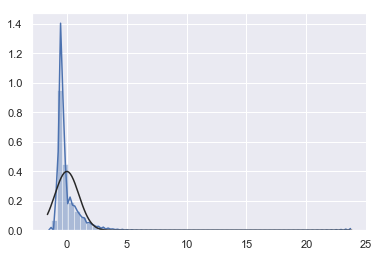

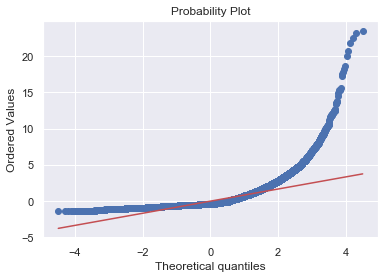

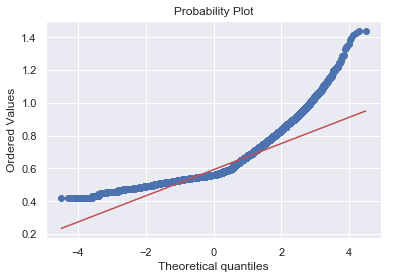

In [29]:
from scipy.stats import norm
from scipy import stats
sns.distplot(list(y), fit=norm);

fig = plt.figure()
res = stats.probplot(list(y), plot=plt)
fig = plt.figure()
res = stats.probplot(list(np.log10(np.array(list(y))+4)), plot=plt)

## Creation of the models

In [30]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='sqrt',
                                  min_samples_leaf=1, min_samples_split=10, n_estimators=30,verbose = 2,n_jobs = 5)

C:\Users\avillemin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
regressor.fit(X, y)

building tree 1 of 30building tree 2 of 30building tree 3 of 30building tree 4 of 30building tree 5 of 30




building tree 6 of 30
building tree 7 of 30
building tree 8 of 30building tree 9 of 30

building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30building tree 14 of 30building tree 15 of 30


building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30building tree 20 of 30

building tree 21 of 30
building tree 22 of 30
building tree 23 of 30building tree 24 of 30

building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    6.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=5,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [32]:
y_pred = regressor.predict(X_eval)

[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished


## Reverse standard normal distribution

In [33]:
for i in range(len(y_pred)):
    article = meta_eval.article_nom[i]
    y_pred[i] = y_pred[i]*std[article]+means[article]

## From continuous to discrete

In [34]:
for i in range(len(y_pred)):
    dictio = prices_dist[meta_eval.article_nom[i]]
    mini = 100
    min_dist = 1000
    for j in dictio:
        if abs(y_pred[i]-float(j))<min_dist:
            min_dist = abs(y_pred[i]-float(j))
            mini = j
    y_pred[i] = float(mini)

In [35]:
y_pred

array([0.93, 0.56, 0.56, ..., 0.46, 0.  , 0.  ])

## Write the final csv file

In [36]:
y_pred_final = []
for i in range(len(y_pred)):
    y_pred_final.append(','.join(str(y_pred[i]).split('.')))

In [37]:
y_final = pd.concat([meta_eval.id,pd.DataFrame(y_pred_final,columns=['quantite_vendue'])],axis=1)

In [38]:
y_final.head()

,id,quantite_vendue
0,d6b7325d4544,"0,93"
1,7e973c9fb5d5,"0,56"
2,98134d247208,"0,56"
3,0d68f5fe7f6c,"1,85"
4,f2d271ad7069,"1,3"


In [39]:
y_final.to_csv('pred.csv',';',index=False)

## Grid Search

In [ ]:
param_grid = {'max_depth': [20,50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = param_grid,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,
                           n_jobs = 3,
                           verbose = 3)
grid_search = grid_search.fit(X, y)